<h2 align="center"> <font color="Pink">Sentiment Analysis of Movie reviews </h2> </font>


In this project I have predicted the sentiment of movie review. The classification is binary Positive(1) or Negavtive(0). I have employed the pretrained weights of the Glove Embedding by Stanford researchers to leverage the lexical semantics of individual words. I trained on 10000 instances and tested on the same number of instances.

For better readability, the notebook has been separated into the following three sections:
* <font size="+1">[Data Processing](#data_processing)</font>
* <font size="+1">[Embedding Matrix](#Embedding_Layer) </font>
* <font size="+1">[Model](#Model)</font>

In [9]:
import keras
keras.__version__

'2.3.0'

<a id="data_processing"></a>

### Data Processing 

The data has been downloaded from the following Stanford's website: http://ai.stanford.edu/~amaas/data/sentiment/

In [2]:
import pandas as pd

path = "G:/Projects/Movie_review" # address of the folder where data is
data = pd.read_csv(path+"/IMDB Dataset.csv")

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
texts = data['review'].to_list() #converting the review column into a list of lists. each review is a list

In [6]:
import numpy as np
labels = np.where(data['sentiment']=='positive', 1 , 0).tolist() # Encoding the positive to 1 and negative to 0

In [24]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

maxlen = 200  # We will cut reviews after 200 words
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [31]:
data = pad_sequences(sequences, maxlen=maxlen) # Because the input layer expects everything of the same length
labels = np.asarray(labels)

x_train, y_train = data[:25000], labels[:25000]

In [26]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 124252 unique tokens.


<a id="Embedding_Layer"></a>

### Embedding Matrix

In [18]:
glove_dir = "G:/UConn_Classes/Fall'19/Deep_Learning/Books/other"
import os


embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [19]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

<a id="Model"></a>

### Model 

In [39]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout

model = Sequential(name="seq_emb")
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "seq_emb"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 200, 100)          1000000   
_________________________________________________________________
flatten_8 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                640032    
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 1,640,065
Trainable params: 1,640,065
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [41]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
#model.save_weights('pre_trained_glove_model.h5')

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.7168 - acc: 0.5041 - val_loss: 0.6935 - val_acc: 0.4858
Epoch 2/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.6960 - acc: 0.5066 - val_loss: 0.6932 - val_acc: 0.4872
Epoch 3/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.6939 - acc: 0.5087 - val_loss: 0.6929 - val_acc: 0.4920
Epoch 4/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.6915 - acc: 0.5191 - val_loss: 0.6920 - val_acc: 0.5034
Epoch 5/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.6887 - acc: 0.5300 - val_loss: 0.6928 - val_acc: 0.5036
Epoch 6/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.6830 - acc: 0.5398 - val_loss: 0.6954 - val_acc: 0.5180
Epoch 7/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.6742 - acc: 0.5516 - val_loss: 0.6897 - val_acc:

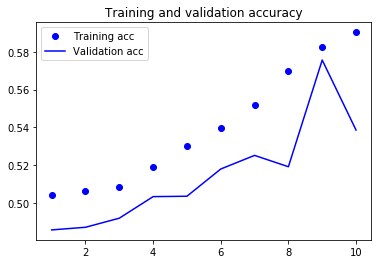

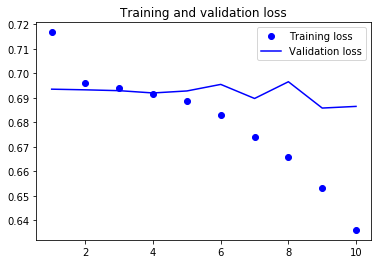

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()